# **Métodos de Agrupamiento**

De acuerdo con el Caso Introductorio del Capítulo 12 del Libro Guía (Analítica de Negocios – Comunicación con Números Autor:Jaggia), implementar un modelo KNN (Key Nearest Neighbor) y un modelo K-Means para determinar la inscripción de una persona al Fitness Center.

# **Librerias, Datos y Matriz de Correlación**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Para no tener que cargar el archivo
from google.colab import drive
drive.mount('/content/drive')

1. Cargar el archivo

In [ ]:
data="/content/drive/MyDrive/Analisis de negocios int/3. BD1-GymData_Int.xlsx"
data=pd.read_excel(data, sheet_name=0)
data=data.dropna()
data.head(100)

datax= data[["Age","Income","Hours","Enroll",]]

sns.pairplot(datax, hue='Enroll', height=3, vars=['Age','Income','Hours'])



#si tiene graficos relacionados es porque muestran buena correlacion con la variable de salida, en este caso Enroll.

In [ ]:
#Para confirmar la correlación
corr= datax.corr()
print("esta es la matriz de la correlacion:", corr)
sns.heatmap(corr, annot=True)

#Correlacion entre las mismas variables es la diagonal principal.
#Las que estan mas cercanas a 1 o -1 son las que tiene mejor correlacion.
#1 indica una correlación positiva perfecta:  cuando una variable aumenta, la otra también aumenta en una cantidad constante
# 0 indica que no hay correlación.
#-1 indica una correlación negativa perfecta: cuando una variable aumenta, la otra disminuye en una cantidad constante, y viceversa.

# **KNN**

In [ ]:

xd= np.array(datax.iloc[:,0:3]) #Todas las variables de entrada
yd= np.array(datax.iloc[:,3]) #Variable de salida


mknn= KNeighborsClassifier(n_neighbors=10) #Tomar 10 vecinos
mknn.fit(xd,yd) #Ajustar el modelo

ydp= mknn.predict(xd) #evaluamos el funcionamiento del modelo.

#Matriz de confusion
cm= confusion_matrix(yd, ydp)
print("Esta es la matriz de confusión:", cm)

#    0   1
# 0  VN  FP
# 1  FN  VP

VN= cm[0,0]
FP= cm[0,1]
FN= cm[1,0]
VP= cm[1,1]

print("exactitud=", (VP+VN)/(VP+VN+FP+FN))
print("sensibilidad=", VP/(VP+FN))
print("espeficidad=", VN/(VN+FP))



Esta es la matriz de confusión: [[538  59]
 [145 258]]
exactitud= 0.796
sensibilidad= 0.6401985111662531
espeficidad= 0.9011725293132329


No va a comprar la membresía


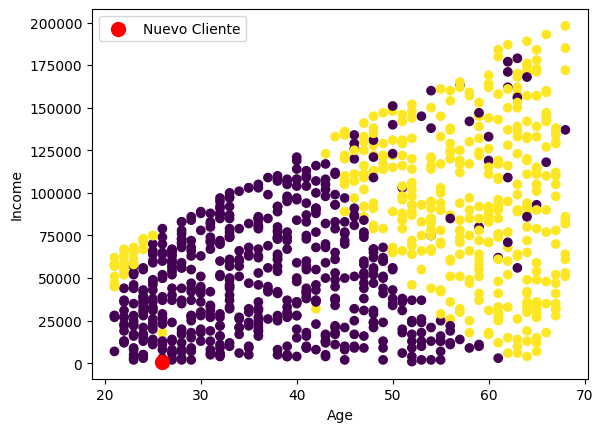

In [ ]:
#Modelo para un nuevo clientes
XDP= np.array([[26,800,15]])
ydp1= mknn.predict(XDP)
if ydp1[0] == 1:
    print("Si va a comprar la membresía")
else:
    print("No va a comprar la membresía")


plt.scatter(xd[:,0], xd [:,1],c=yd,cmap="viridis")
plt.scatter(XDP [: ,0], XDP [: ,1], marker='o', s=100, facecolors= 'Red', label='Nuevo Cliente')
plt.xlabel("Age"); plt.ylabel("Income"); plt.legend()
plt.show()

# **KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedo la primera persona 3
Donde quedo la segunda persona 3
Donde quedo la tercera persona 1
Donde quedo la cuarta persona 2
El cliente potencial del Fitness Center quedo en el cluster: [3]


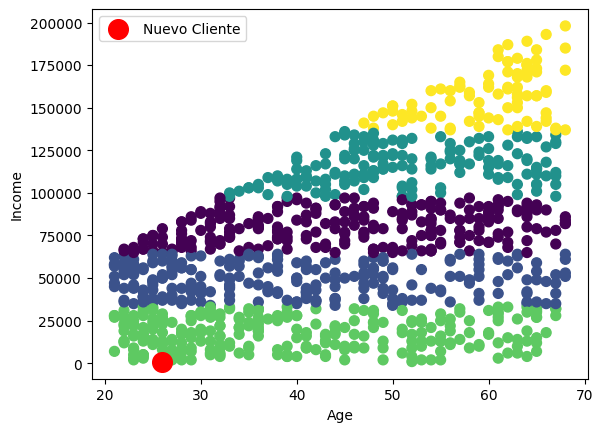

No va a comprar la membresía


In [ ]:
np.random.seed (42) #para que a todos nos de el modelo

 #5 clusters - montoncitos de datos
mkm=KMeans(n_clusters=5, init='random', random_state=42)
mkm.fit(xd, yd)
labels=mkm.labels_
print('Donde quedo la primera persona', labels[0,])
print('Donde quedo la segunda persona', labels[1,])
print('Donde quedo la tercera persona', labels[2,])
print('Donde quedo la cuarta persona', labels[3,])


XDP2= np.array([[26, 800,15]])
ydp2=mkm.predict(XDP2)
print('El cliente potencial del Fitness Center quedo en el cluster:', ydp2)

#Se mapean los cluster
plt.scatter(xd[:,0], xd [:,1],c=labels, s=50, cmap="viridis")
plt.scatter(XDP2 [: ,0], XDP2 [: ,1], marker='o', s=200, facecolors= 'Red',label='Nuevo Cliente')
plt.xlabel("Age"); plt.ylabel("Income");plt.legend()
plt.show()


if ydp2[0] == 1:
    print("Si va a comprar la membresía")
else:
    print("No va a comprar la membresía")



In [ ]:
#Clusters y porcentajes de compra de la memebresia

c00= len(np.where((labels==0) & (yd==0))[0])
c01= len(np.where((labels==0) & (yd==1))[0])
print('El porcentaje de que una persona compre la membresía es:', c00/(c00+c01)*100)
print('El porcentaje de que una persona no compre la membresía es:', c01/(c00+c01)*100)

c10=len(np.where((labels==1) & (yd==0))[0])
c11= len(np.where((labels==1) & (yd==1))[0])
print('El porcentaje de que una persona compre la membresía es:', c10/(c10+c11)*100)
print('El porcentaje de que una persona no compre la membresía es:', c11/(c10+c11)*100)


c20= len(np.where((labels==2) & (yd==0))[0])
c21= len(np.where((labels==2) & (yd==1))[0])
print('El porcentaje de que una persona compre la membresía es:', c20/(c20+c21)*100)
print('El porcentaje de que una persona no compre la membresía es:', c21/(c20+c21)*100)

c30= len(np.where((labels==3) & (yd==0))[0])
c31= len(np.where((labels==3) & (yd==1))[0])
print('El porcentaje de que una persona compre la membresía es:', c30/(c30+c31)*100)
print('El porcentaje de que una persona no compre la membresía es:', c31/(c30+c31)*100)

c40= len(np.where((labels==4) & (yd==0))[0])
c41= len(np.where((labels==4) & (yd==1))[0])
print('El porcentaje de que una persona compre la membresía es:', c40/(c40+c41)*100)
print('El porcentaje de que una persona no compre la membresía es:', c41/(c40+c41)*100)





El porcentaje de que una persona compre la membresía es: 52.84552845528455
El porcentaje de que una persona no compre la membresía es: 47.15447154471545
El porcentaje de que una persona compre la membresía es: 72.26890756302521
El porcentaje de que una persona no compre la membresía es: 27.73109243697479
El porcentaje de que una persona compre la membresía es: 31.84713375796178
El porcentaje de que una persona no compre la membresía es: 68.15286624203821
El porcentaje de que una persona compre la membresía es: 84.87084870848709
El porcentaje de que una persona no compre la membresía es: 15.129151291512915
El porcentaje de que una persona compre la membresía es: 17.045454545454543
El porcentaje de que una persona no compre la membresía es: 82.95454545454545


In [ ]:
print("Cantidad de individuos que se inscribiran al Fitness Center en el cluster 0:", c01)
print("Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 0:", c00)
print("Cantidad de individuos que se inscribiran al Fitness Center en el cluster 1:", c11)
print("Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 1:", c10)
print("Cantidad de individuos que se inscribiran al Fitness Center en el cluster 2:", c21)
print("Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 2:", c20)
print("Cantidad de individuos que se inscribiran al Fitness Center en el cluster 3:", c31)
print("Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 3:", c30)
print("Cantidad de individuos que se inscribiran al Fitness Center en el cluster 4:", c41)
print("Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 4:", c40)

Cantidad de individuos que se inscribiran al Fitness Center en el cluster 0: 116
Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 0: 130
Cantidad de individuos que se inscribiran al Fitness Center en el cluster 1: 66
Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 1: 172
Cantidad de individuos que se inscribiran al Fitness Center en el cluster 2: 107
Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 2: 50
Cantidad de individuos que se inscribiran al Fitness Center en el cluster 3: 41
Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 3: 230
Cantidad de individuos que se inscribiran al Fitness Center en el cluster 4: 73
Cantidad de individuos que NO inscribiran al Fitness Center en el cluster 4: 15


In [ ]:
#Cual es la carcateristica sociodemografica de cada cluster.
# Age; Income; Hours
np.set_printoptions(suppress=True)
clusters=mkm.cluster_centers_
print("Esta es la caracteristica sociodemografica de cada cluster:\n", clusters)

Esta es la caracteristica sociodemografica de cada cluster:
 [[    44.85772358  80146.34146341     10.33333333]
 [    39.74789916  49365.54621849     10.28151261]
 [    51.2611465  115770.70063694      9.8089172 ]
 [    39.6900369   17760.14760148     10.18819188]
 [    60.03409091 157795.45454545     10.13636364]]


In [ ]:
# Obtener el número de individuos en cada clúster
cluster_counts = np.bincount(labels)

# Encontrar el clúster con la mayor edad, ingresos y horas en el gimnasio
max_age_cluster = np.argmax(clusters[:, 0])
max_income_cluster = np.argmax(clusters[:, 1])
max_hours_cluster = np.argmax(clusters[:, 2])

# Imprimir los resultados
for i, count in enumerate(cluster_counts):
  print(f"Clúster {i}: {count} individuos")

print(f"Clúster con mayor edad: {max_age_cluster}")
print(f"Clúster con mayores ingresos: {max_income_cluster}")
print(f"Clúster con mayor número de horas en el gimnasio: {max_hours_cluster}")

Clúster 0: 246 individuos
Clúster 1: 238 individuos
Clúster 2: 157 individuos
Clúster 3: 271 individuos
Clúster 4: 88 individuos
Clúster con mayor edad: 4
Clúster con mayores ingresos: 4
Clúster con mayor número de horas en el gimnasio: 0


# **Análisis de Resultados**


El análisis de los modelos de KNN y K-Means muestra que la variable edad (Age) es el mejor predictor de la inscripción al gimnasio, presentando la mayor correlación con la variable de compra de membresía (Enroll) con un valor de 0.644033. Los ingresos (Income) también juegan un rol importante, con una correlación de 0.47 con la edad, lo que refuerza la relación entre el poder adquisitivo y la decisión de compra. El modelo KNN predice con un 79.6% de exactitud, con una sensibilidad del 64.01% y una especificidad del 90.11%, lo que indica que tiene mayor capacidad para identificar a quienes no se inscribirán, pero una menor precisión al detectar compradores potenciales. Un nuevo cliente de 26 años, con ingresos anuales de 800 y que realiza 15 horas de ejercicio semanalmente, no compraría la membresía según ambos modelos.

Los resultados del modelo de K-Means revelan distintos comportamientos según el grupo o "cluster". El cluster 3 destaca con el mayor porcentaje de compra (84.87%), mientras que el cluster 4 presenta el menor (17.04%). Estos grupos permiten identificar tendencias más específicas sobre las probabilidades de inscripción según la segmentación de edad, ingresos y hábitos de ejercicio. En total, hay diferencias notables en los tamaños de los clusters y en la proporción de compra y no compra, lo que sugiere que ciertos perfiles de clientes tienen una mayor propensión a inscribirse que otros.

En conclusión, el análisis de los modelos KNN y K-Means permite identificar que la edad y los ingresos son los factores más determinantes para predecir la inscripción al gimnasio. Aunque el modelo KNN ofrece una buena exactitud, su capacidad de predicción es más efectiva en identificar a los no compradores, mientras que los resultados de K-Means proporcionan una segmentación valiosa de los clientes según sus comportamientos. Esto sugiere que estrategias de marketing y ventas personalizadas, enfocadas en los segmentos más propensos a inscribirse, podrían aumentar la efectividad en la captación de nuevos miembros del gimnasio.
